In [1]:
import os
import sys
import warnings

warnings.filterwarnings("ignore")
sys.path.append(os.path.abspath("../Scripts"))

In [2]:
from data_processing import load_data,explore_data,class_distribution


#Load the dataset
df = load_data()

In [3]:
#Display few rows of the data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Get information and Stastical summery
explore_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Preprocess the Data

In [5]:
#checking missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
#Normalize the Amount feature
from sklearn.preprocessing import StandardScaler

df["Amount"] = StandardScaler().fit_transform(df["Amount"].values.reshape(-1,1))

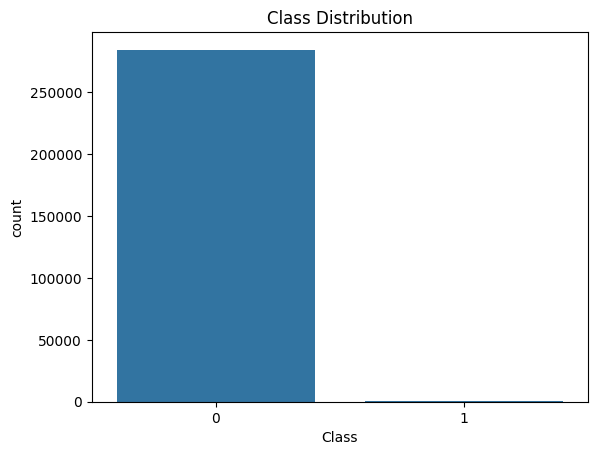

In [ ]:
#check class distrbution
class_distribution(df)

### Split Data into Training and Testing Sets

In [7]:
from preprocessing import normalize_data
from split_data import split_data

# Preprocess data
data = normalize_data(df)
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = split_data(X,y)

### Handle Class Imbalance

```Use oversampling (SMOTE) or undersampling techniques.```

In [9]:
from preprocessing import handle_class_imbalance

X_resampled, y_resampled = handle_class_imbalance(X, y)

Class
0    284315
1    284315
Name: count, dtype: int64


### Train a Classification Model

```Using Logistic Regression machin learning model ```

In [10]:
from model_training import lr_train_model

lr_model = lr_train_model(X_train, y_train)

```Using Random Forest machin learning model```

In [11]:
from model_training import rf_train_model

rf_model = rf_train_model(X_train, y_train)

### Evaluate the Model

```Use precision, recall, F1-score, and a confusion matrix.```

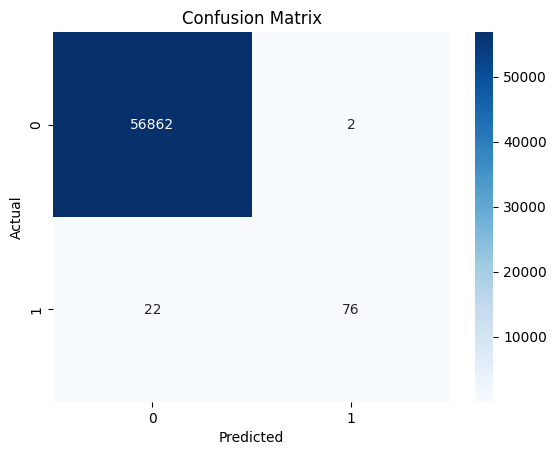

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



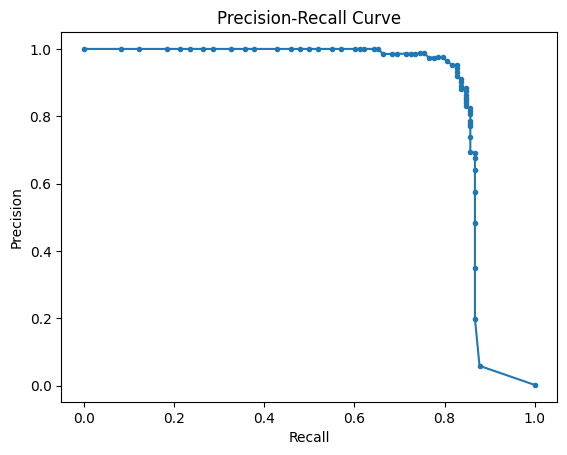

ROC-AUC Score: 0.9371100613852744


In [12]:
from evaluation import evaluate_model

evaluate_model(rf_model, X_test, y_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print("Logistic Regression:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56847    17]
 [   17    81]]


### Optimize the Model

#### Hyperparameter Tuning with Grid Search

In [12]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1')
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

KeyboardInterrupt: 